In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [2]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [3]:
# Read NIRV reflectance raster image
img_900 = rio.open(cwd_Images_Processed + "\\San Rossore\\NIRV Reflectance 900m.tif")
img_1350 = rio.open(cwd_Images_Processed + "\\San Rossore\\NIRV Reflectance 1350m.tif")
band_900 = img_900.read(1)
band_1350 = img_1350.read(1)
band_900.shape

(90, 90)

In [4]:
band_900_reshape = band_900.reshape(-1)
band_900_reshape = band_900_reshape / 1000
band_1350_reshape = band_1350.reshape(-1)
band_1350_reshape = band_1350_reshape / 1000
band_1350_reshape

array([1.77746992, 1.72739166, 1.6904827 , ..., 1.28693832, 1.38123252,
       1.41128259])

In [5]:
# Get the coordinates
list_Coordinates = []
for x in range(img_900.shape[0]):
    for y in range(img_900.shape[1]):
        temp_x, temp_y = img_900.xy(x, y)
        temp_list = [temp_x / 1000, temp_y / 1000]
        list_Coordinates.append(temp_list)
arr_Coordinates_900 = np.array(list_Coordinates)
arr_Coordinates_900

array([[ 603.525, 4843.365],
       [ 603.535, 4843.365],
       [ 603.545, 4843.365],
       ...,
       [ 604.395, 4842.475],
       [ 604.405, 4842.475],
       [ 604.415, 4842.475]])

In [6]:
# Get the coordinates
list_Coordinates = []
for x in range(img_1350.shape[0]):
    for y in range(img_1350.shape[1]):
        temp_x, temp_y = img_1350.xy(x, y)
        temp_list = [temp_x / 1000, temp_y / 1000]
        list_Coordinates.append(temp_list)
arr_Coordinates_1350 = np.array(list_Coordinates)
arr_Coordinates_1350

array([[ 603.295, 4843.595],
       [ 603.305, 4843.595],
       [ 603.315, 4843.595],
       ...,
       [ 604.625, 4842.245],
       [ 604.635, 4842.245],
       [ 604.645, 4842.245]])

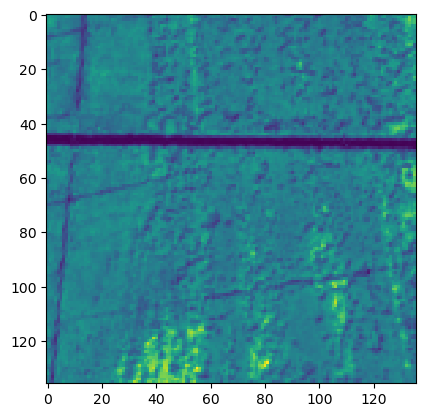

In [12]:
plt.imshow(band_1350, interpolation='none')
plt.show()

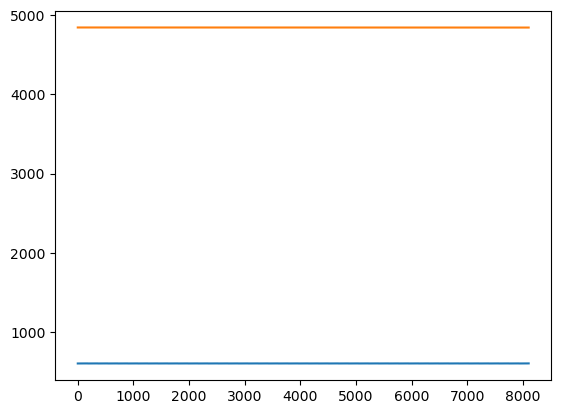

In [14]:
plt.plot(arr_Coordinates_900)

In [7]:
V_900 = skg.Variogram(arr_Coordinates_900, band_900_reshape, use_nugget=True, n_lags = 90, normalize = True)

KeyboardInterrupt: 

In [ ]:
V_900.parameters

[0.07670720884072377, 0.11852082826945953, 1.660537998814069e-21]

In [21]:
V_1350 = skg.Variogram(arr_Coordinates_1350, band_1350_reshape, use_nugget=True, n_lags = 40, normalize = True)

In [ ]:
V_1350.parameters

[0.3792118067400359, 0.0326640522803367, 0.09135752984583563]

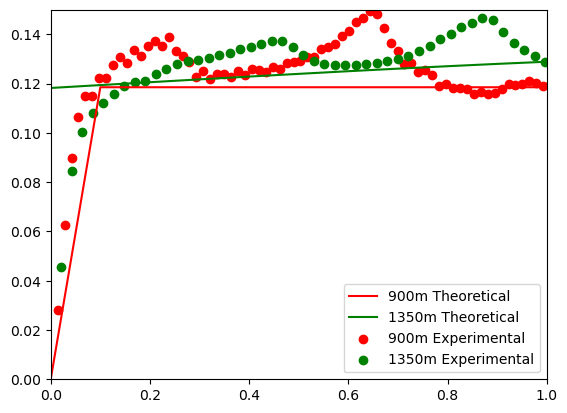

In [41]:
x = np.linspace(0,1.5,16, dtype = float)
def f_900(x):
   return V_900.fitted_model(x)
def f_1350(x):
   return V_1350.fitted_model(x)
plt.plot(x, f_900(x),label = '900m Theoretical', color = 'Red')
plt.plot(x, f_1350(x), label = '1350m Theoretical', color = 'Green')
plt.scatter(V_900.get_empirical()[0],V_900.get_empirical()[1], color = 'Red', label = '900m Experimental')
plt.scatter(V_1350.get_empirical()[0],V_1350.get_empirical()[1], color = 'Green', label = '1350m Experimental')
plt.xlim(0,1)
plt.ylim(0,0.15)
plt.legend()

In [9]:
V.parameters[0]

1.9091883092039514

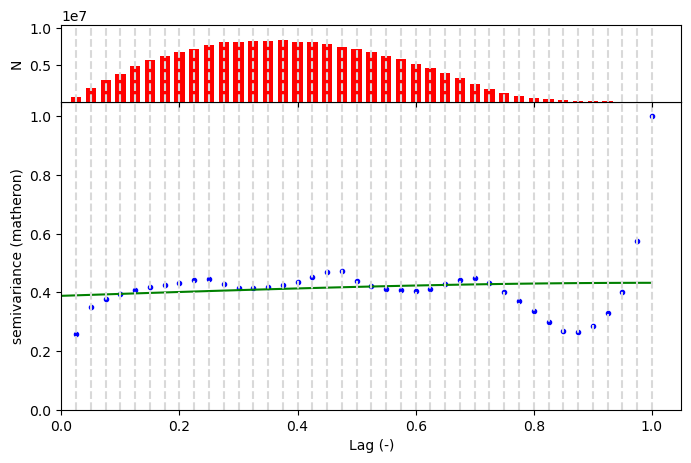

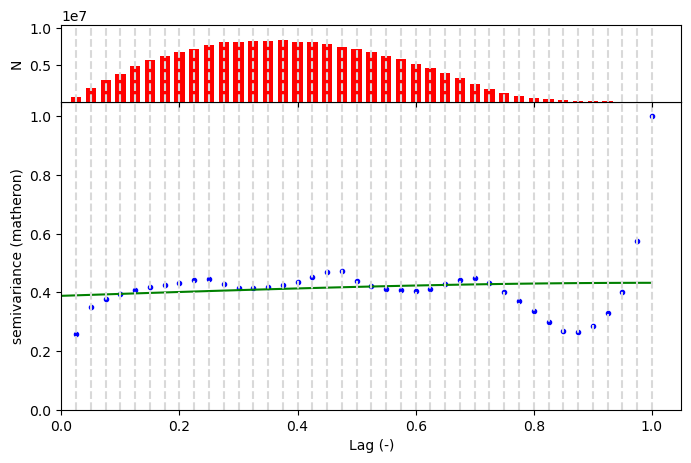

In [22]:
V_1350.plot(show = True, hist = True)

In [11]:
V.experimental

array([0.0892457 , 0.11261317, 0.12041329, 0.12601276, 0.1297632 ,
       0.13272825, 0.13598326, 0.1346404 , 0.12828779, 0.12758833,
       0.12913042, 0.13331354, 0.14034105, 0.14565949, 0.13710214,
       0.12924152, 0.12581944, 0.12473433, 0.12745143, 0.13412755,
       0.13775347, 0.13176208, 0.11933744, 0.10518624, 0.09050342,
       0.08112619, 0.085979  , 0.10325403, 0.13654465, 0.25677742])

In [12]:
m = V.data(n = 8100)[0]
m

array([0.00000000e+00, 2.35731363e-04, 4.71462726e-04, ...,
       1.90871685e+00, 1.90895258e+00, 1.90918831e+00])

In [13]:
range = V.parameters[0]
range

1.9091883092039514

In [14]:
for ele in m:
    if ele == range:
        print("A")

In [15]:
V.distance

array([0.01, 0.02, 0.03, ..., 0.01, 0.02, 0.01])

In [16]:
V.get_empirical()

(array([0.06363961, 0.12727922, 0.19091883, 0.25455844, 0.31819805,
        0.38183766, 0.44547727, 0.50911688, 0.57275649, 0.6363961 ,
        0.70003571, 0.76367532, 0.82731493, 0.89095454, 0.95459415,
        1.01823376, 1.08187338, 1.14551299, 1.2091526 , 1.27279221,
        1.33643182, 1.40007143, 1.46371104, 1.52735065, 1.59099026,
        1.65462987, 1.71826948, 1.78190909, 1.8455487 , 1.90918831]),
 array([0.0892457 , 0.11261317, 0.12041329, 0.12601276, 0.1297632 ,
        0.13272825, 0.13598326, 0.1346404 , 0.12828779, 0.12758833,
        0.12913042, 0.13331354, 0.14034105, 0.14565949, 0.13710214,
        0.12924152, 0.12581944, 0.12473433, 0.12745143, 0.13412755,
        0.13775347, 0.13176208, 0.11933744, 0.10518624, 0.09050342,
        0.08112619, 0.085979  , 0.10325403, 0.13654465, 0.25677742]))